In [82]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Data Import

In [2]:
employee_data = pd.read_csv(r"C:\Users\Jer_SMU\Desktop\SMU\IS630-G1-Statistical Thinking for Data Science\Assignment 1\Employee_Data (1).csv") 
employee_data.columns

Index(['Name', 'Salary', 'DOJ', 'Age', 'Gender', 'Dependents', 'HA', 'COLA',
       'CPF', 'Gross Salary', 'Insurance', 'Marital Status',
       'In Company Years', 'Year of Experience', 'Department', 'Position'],
      dtype='object')

### 1.2 Exploratary data analysis

In [63]:
def check_data_issues(df):
   # Check for missing values
    print("Missing values:\n", df.isnull().sum())
    print("\n")

    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"Number of duplicate rows: {duplicate_rows}")
    print("\n")

    # Check for outliers using Z-score (values > 3 standard deviations away from the mean)
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    print("Outliers detected (values > 3 standard deviations from mean):")
    for col in numerical_cols:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = (z_scores > 3).sum()
        print(f"{col}: {outliers} outliers")
    print("\n")

    # Check for inconsistent data types
    print("Data types:\n", df.dtypes)
    print("\n")

    # Check for negative values in numerical columns where negatives don't make sense (e.g., Salary, Age)
    print("Columns with negative values (where not expected):")
    for col in numerical_cols:
        if (df[col] < 0).any():
            print(f"{col} has negative values")
    print("\n")

In [64]:
check_data_issues(employee_data)

Missing values:
 Name                     0
Salary                   0
DOJ                      0
Age                      0
Gender                   0
Dependents               0
HA                       0
COLA                     0
CPF                      0
Gross Salary             0
Insurance             1136
Marital Status           0
In Company Years         0
Year of Experience       0
Department               0
Position                 0
dtype: int64


Number of duplicate rows: 0


Outliers detected (values > 3 standard deviations from mean):
Salary: 0 outliers
Age: 0 outliers
Dependents: 0 outliers
HA: 0 outliers
COLA: 0 outliers
CPF: 0 outliers
Gross Salary: 0 outliers
In Company Years: 17 outliers
Year of Experience: 0 outliers


Data types:
 Name                   object
Salary                float64
DOJ                    object
Age                     int64
Gender                 object
Dependents              int64
HA                    float64
COLA                  float

In [6]:
df = pd.DataFrame()
for i in range(len(clean_data)):
    df['rate'] = clean_data['Salary'] / clean_data['COLA']

In [7]:
df['rate'] = df['rate'].round(5)


In [8]:
df['rate'].unique()

array([4.23711])

In [9]:
df = pd.DataFrame()
for i in range(len(clean_data)):
    df['rate'] = clean_data['Salary'] / clean_data['HA']

df['rate'] = df['rate'].round(5)
df['rate'].unique()

array([12.38277, 29.5745 , 14.24281, ..., 16.90335,  7.50742,  4.05002])

In [10]:
clean_data['HA'].unique()

array([7142.101, 4660.071, 7822.938, ..., 7854.412, 5964.898, 6897.497])

In [3]:
clean_data = employee_data.dropna()
clean_data.describe()

,Salary,Age,Dependents,HA,COLA,CPF,Gross Salary,In Company Years,Year of Experience
count,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000,3464.000000
mean,93894.631631,40.250577,1.946016,7999.392495,22160.046881,13926.561421,110127.509586,9.905312,19.250577
std,33809.015964,11.321650,1.297603,2347.735266,7979.256809,5014.592733,37347.577343,8.771738,11.321650
min,15215.380000,21.000000,0.000000,3127.273000,3590.977762,2256.762931,22624.827875,0.000000,0.000000
25%,70148.855000,30.000000,1.000000,6233.578250,16555.812494,10404.560099,84834.524213,3.000000,9.000000
50%,96562.450000,40.000000,2.000000,7736.742000,22789.677983,14322.255358,110902.120759,7.000000,19.000000
75%,121215.482500,50.000000,3.000000,9535.249250,28608.033585,17978.821930,141209.346527,15.000000,29.000000
max,149991.340000,60.000000,4.000000,14640.034000,35399.416010,22246.890721,173050.731289,39.000000,39.000000


### 1.3 Problem Statement

Age vs. Dependents:
-

The mean age of the employees is 40.25 years, and the mean number of dependents is 1.95. With a median age of 40 years and a median of 2 dependents, this suggests that a significant portion of the workforce is at a stage where family responsibilities are high. This could influence their need for higher compensation, benefits, or work-life balance arrangements. Exploring the relationship between employee age, dependents, and their satisfaction or turnover rates could provide insights into how benefits packages should be tailored to different life stages.

Gross Salary vs. In Company Years:
-
The mean gross salary is SGD110,127, with employees having been with the company for an average of almost 10 years. However, the variation in gross salary is quite large, ranging from SGD22,624 to SGD173,050. This raises questions about the progression of salary with tenure. Analyzing whether employees who stay longer with the company receive significant salary increases, or if there is a plateau after a certain number of years, could provide valuable insights into how well the company rewards loyalty.

Cost of Living Adjustments (COLA):
-
The mean COLA is GSD22,160, but with a standard deviation of RMB7,979, there seems to be significant variation in how this benefit is distributed. The highest COLA is $35,399, indicating that employees in higher-cost areas or with higher roles likely receive larger adjustments, potentially reflecting geographical or seniority-based COLA provisions.

Experience vs. Tenure:
-
The mean years of experience is 19.25 years, while the mean years in the company is just 9.9 years. This suggests that on average, employees have spent roughly half of their careers at this company, which might indicate decent employee retention rates, but the significant standard deviation for years in the company (8.77 years) shows that tenure varies widely.

Significant reliance on cost of living adjustments: The high proportion of employees receiving cost of living adjustments (COLA) suggests that COLA plays a crucial role in the overall compensation structure. It could indicate that many employees work in regions with varying living costs, and the company uses COLA to maintain equity in take-home pay.

No direct link between dependents and salary: Although the distribution of dependents is concentrated around one to two dependents, there doesn't appear to be a direct correlation with salary distribution. This implies that the number of dependents (family responsibility) may not significantly impact employees' income levels.

Widening gap in total compensation: The gap between gross salary and base salary increases with higher income levels. This suggests that higher-paid employees not only earn more in base salary but also receive more in benefits such as housing allowances and COLA.



Correlation between housing allowance and employee retention:

HA (Housing Allowance): Directly analyze the impact of housing allowance.

In Company Years: The number of years an employee has been with the company can indicate retention.

Salary: Evaluate whether housing allowance is significant for employees with different salary levels.

Department: Differences in housing allowance provisions across departments could affect retention.

### 2.1 Discriptive Data Analysis

In [67]:
# Calculate variables for box and whisker plot
dependents_sum = clean_data['Dependents'].value_counts().sort_index()

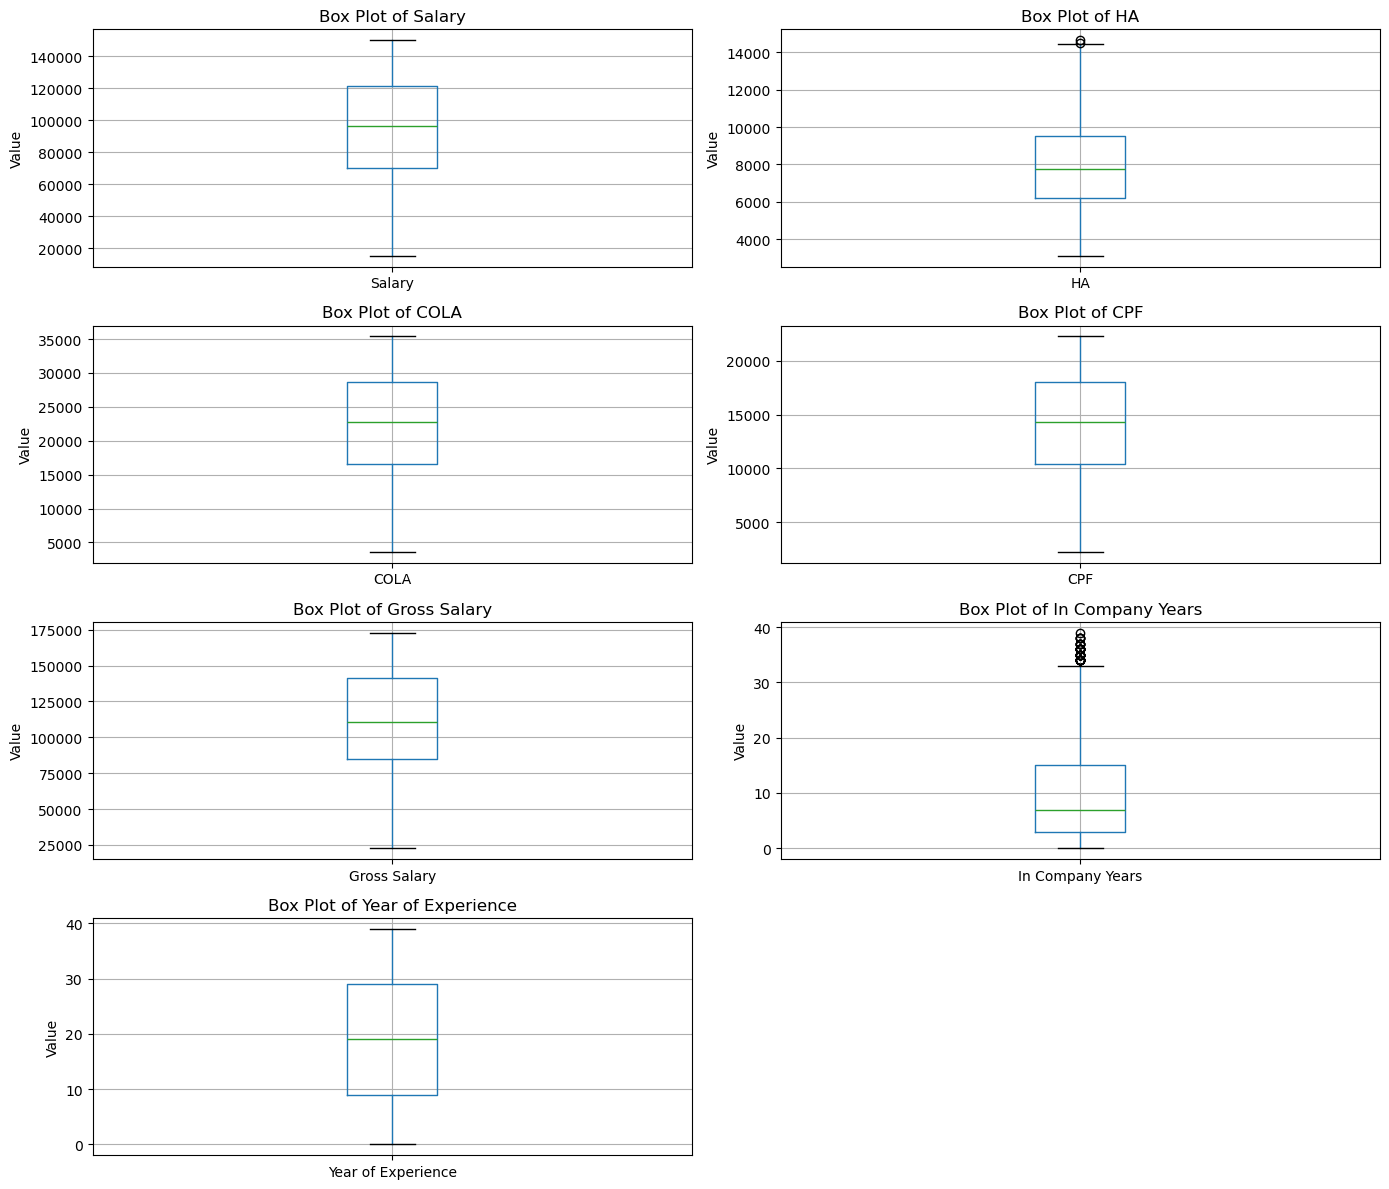

In [66]:
# Create figure and subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 12))  # 4 rows, 2 columns (one extra subplot will remain empty)
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# List of columns for individual plots
columns = ['Salary', 'HA', 'COLA', 'CPF', 'Gross Salary', 'In Company Years', 'Year of Experience']

# Loop through each column and create individual box plots
for i, col in enumerate(columns):
    clean_data[[col]].boxplot(ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel('Value')
    axes[i].grid(True)

# Remove the extra subplot (if any)
fig.delaxes(axes[-1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

#### 2.1.2 Descriptive Statistic Findings

Four Sub-Statements:

1. How the financial burdern the employees might have changes as they move across different life stages?
2. How does the benefit given by the company increased as the employee spent more time in the company?
3. s
4. how does 

Gross Salary vs. In Company Years: Analyze the correlation between gross salary and the number of years employees have spent with the company. Determine whether employees who have been with the company longer are being compensated fairly and whether salary progression is consistent across tenure, or if there is a salary plateau after certain years.

Cost of Living Adjustments (COLA): Examine the effect of COLA on employee motivation and performance, particularly focusing on employees in higher-cost areas or those in senior roles. Investigate whether COLA provisions are adjusted equitably across different regions and positions to ensure a fair and balanced workforce.

Experience vs. Tenure: Explore the relationship between employees' total years of professional experience and their tenure with the company. Determine whether employees with more experience are advancing in their careers more rapidly and whether there are any discrepancies in career development opportunities based on experience and tenure.

### 3.1 Inferential Statistic 

#### 3.1.1 Sampling distribution of continues variable

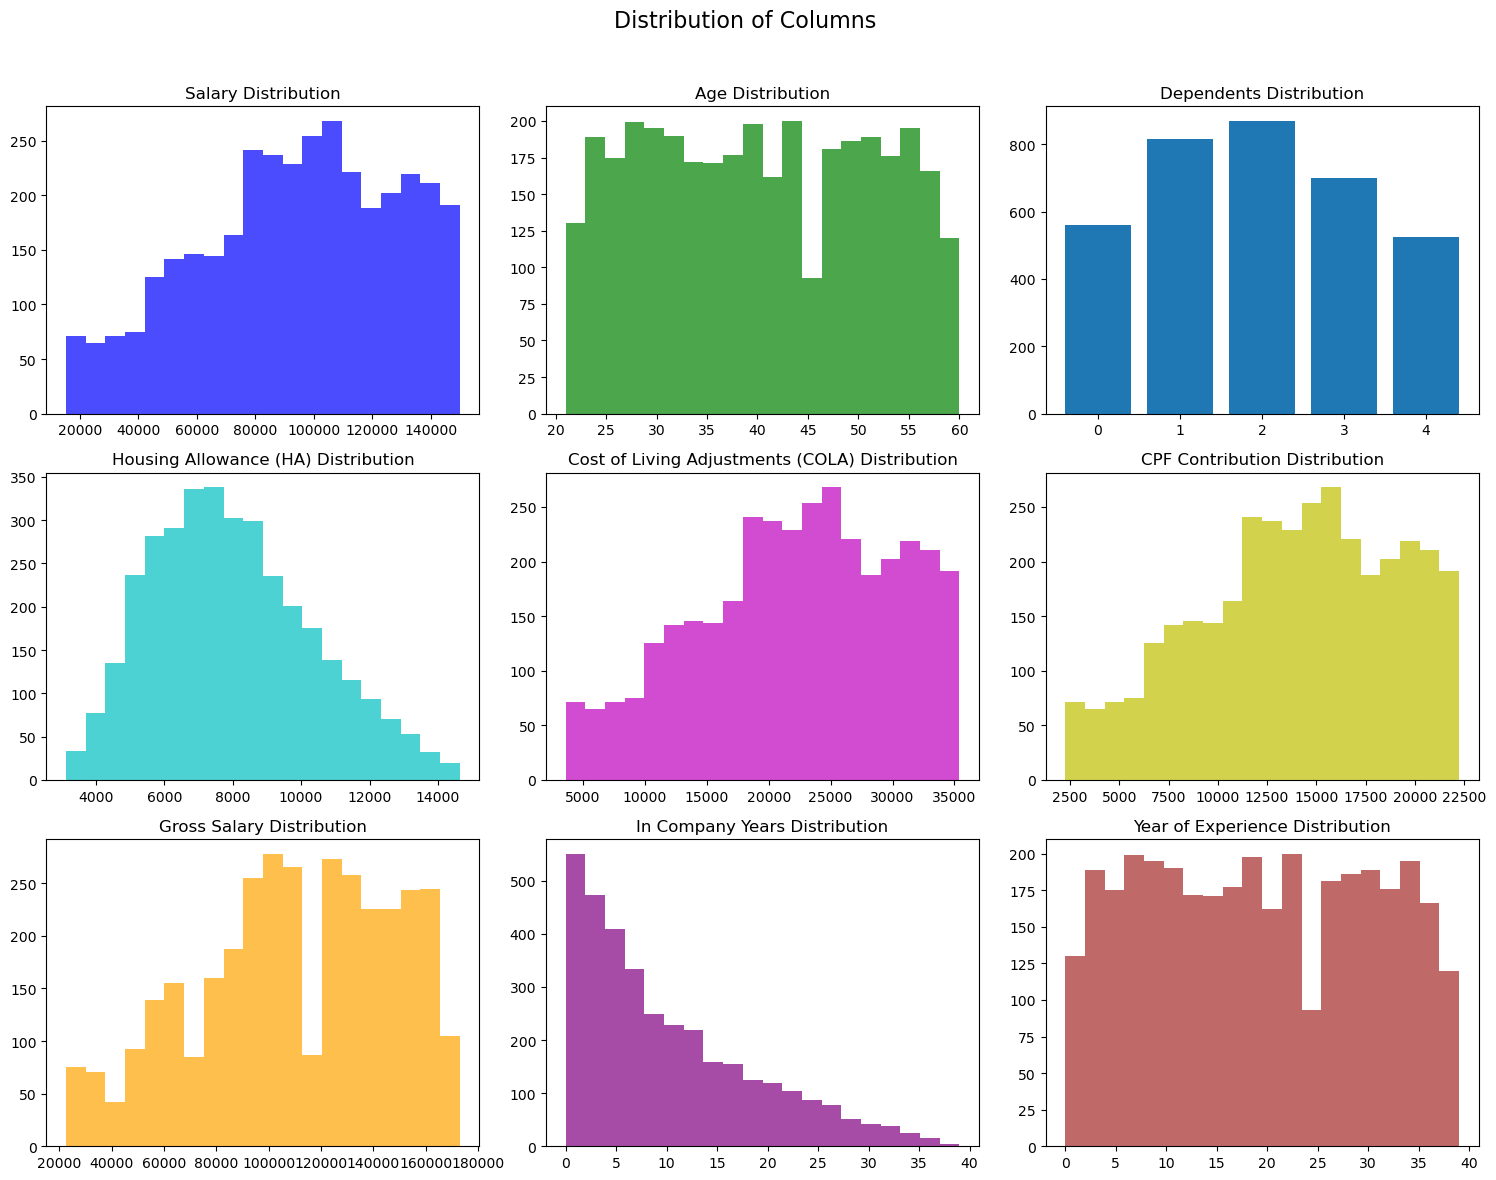

In [11]:
# Set up the matplotlib figure with subplots (3x3 grid)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Columns', fontsize=16)

# Plot each distribution
axes[0, 0].hist(clean_data['Salary'], bins=20, color='b', alpha=0.7)
axes[0, 0].set_title('Salary Distribution')

axes[0, 1].hist(clean_data['Age'], bins=20, color='g', alpha=0.7)
axes[0, 1].set_title('Age Distribution')

axes[0, 2].bar(dependents_sum.index, dependents_sum.values)
axes[0, 2].set_title('Dependents Distribution')

axes[1, 0].hist(clean_data['HA'], bins=20, color='c', alpha=0.7)
axes[1, 0].set_title('Housing Allowance (HA) Distribution')

axes[1, 1].hist(clean_data['COLA'], bins=20, color='m', alpha=0.7)
axes[1, 1].set_title('Cost of Living Adjustments (COLA) Distribution')

axes[1, 2].hist(clean_data['CPF'], bins=20, color='y', alpha=0.7)
axes[1, 2].set_title('CPF Contribution Distribution')

axes[2, 0].hist(clean_data['Gross Salary'], bins=20, color='orange', alpha=0.7)
axes[2, 0].set_title('Gross Salary Distribution')

axes[2, 1].hist(clean_data['In Company Years'], bins=20, color='purple', alpha=0.7)
axes[2, 1].set_title('In Company Years Distribution')

axes[2, 2].hist(clean_data['Year of Experience'], bins=20, color='brown', alpha=0.7)
axes[2, 2].set_title('Year of Experience Distribution')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### 3.1.2 Sampling Distribution of Categorical variable

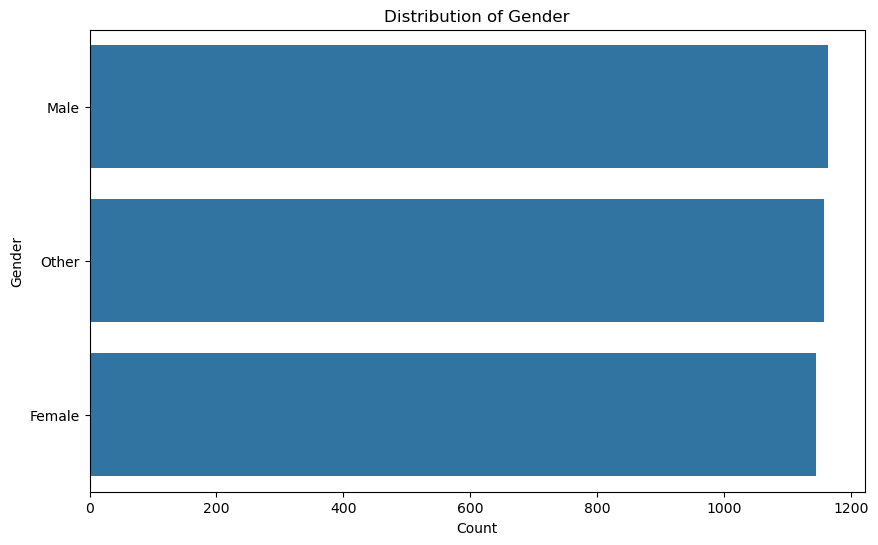

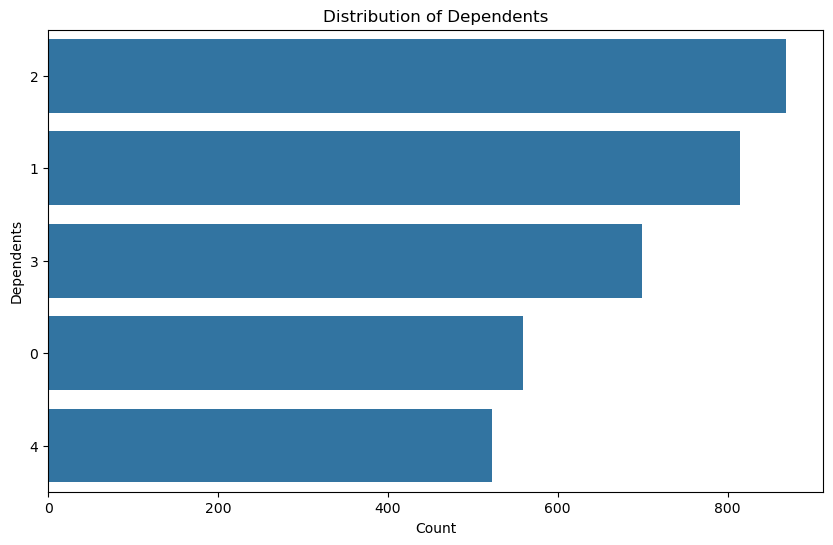

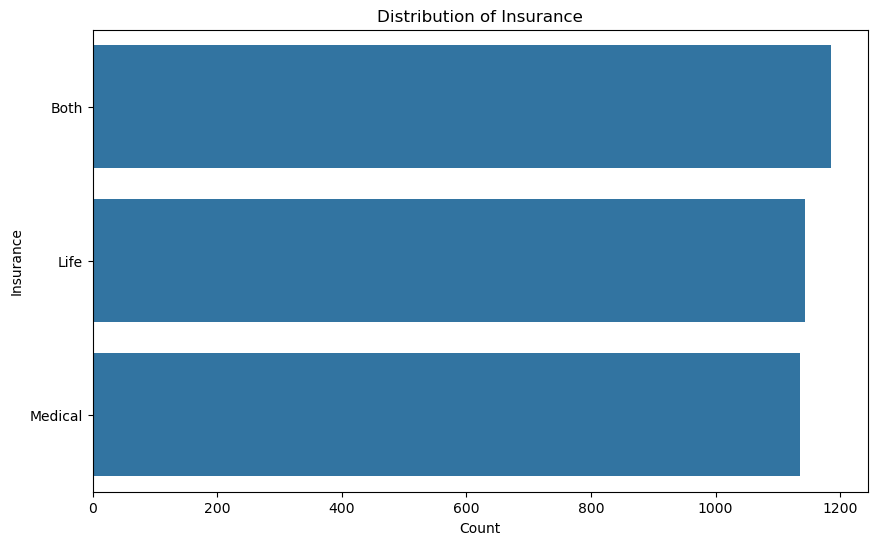

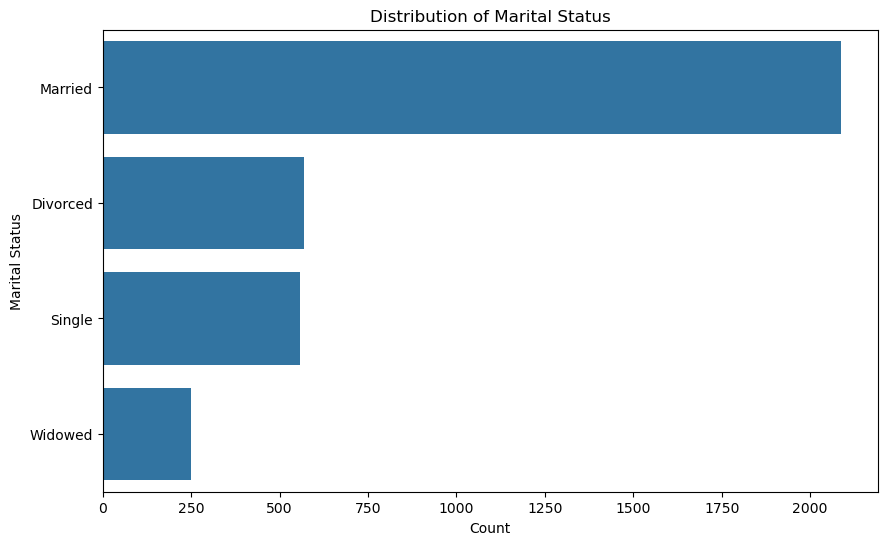

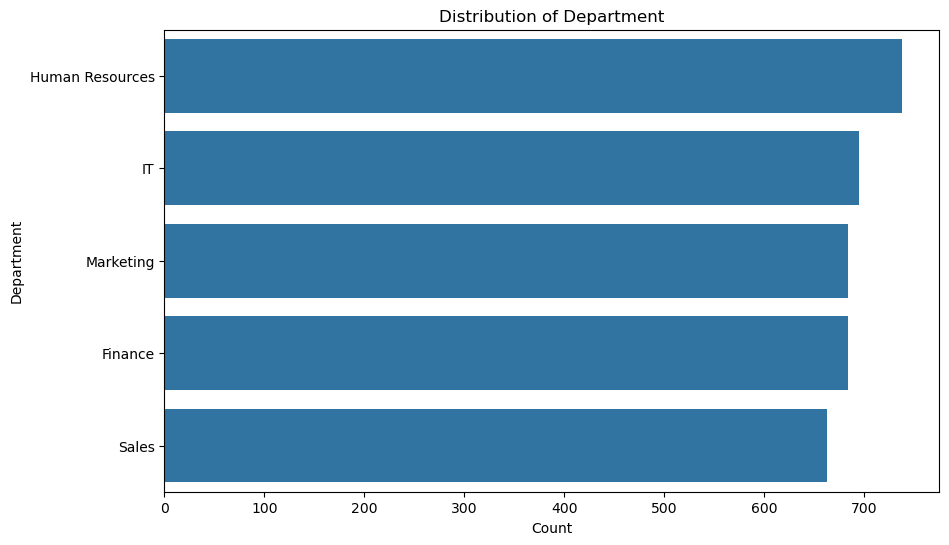

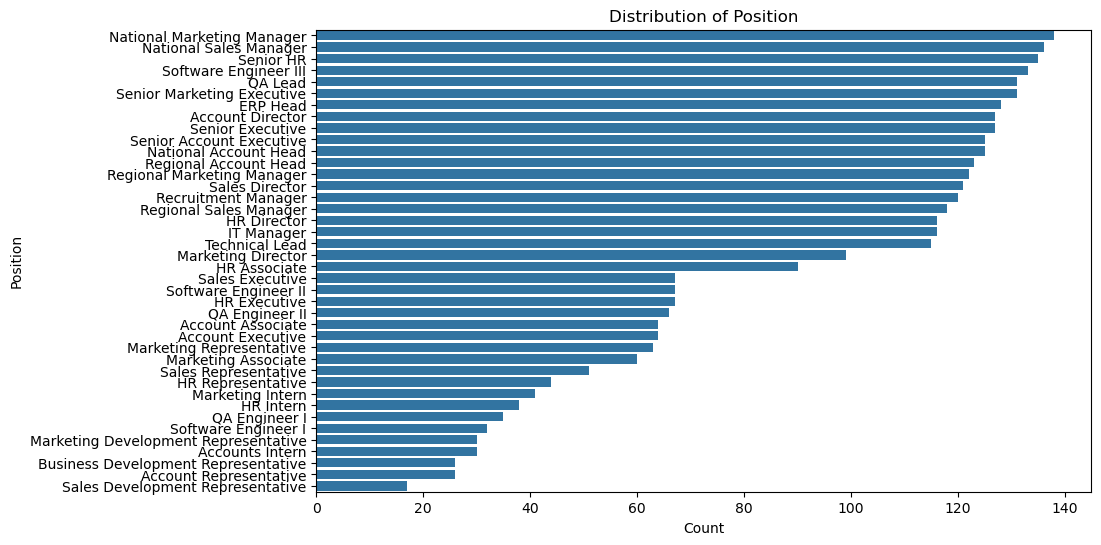

All plots have been saved as PNG files.


In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the categorical columns
categorical_columns = ['Gender', 'Dependents', 'Insurance', 'Marital Status', 'Department', 'Position']

# Loop through each categorical column and plot a horizontal bar plot
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=clean_data, order=clean_data[col].value_counts().index)  # order by frequency
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    
    # Save the figure first, before showing
    plt.savefig(f'{col}_distribution.png', bbox_inches='tight')  # saves as .png

    # Now show the plot after saving
    plt.show()

print("All plots have been saved as PNG files.")


As there are too many entries in the position variable, thus they are grouped together and categorized into Junior, Mid-level and Senior. 

#### 3.1.3 Categorise of Job position Data

In [13]:
clean_data['Position'].unique ()

array(['Regional Marketing Manager', 'National Marketing Manager',
       'National Sales Manager', 'Accounts Intern', 'Software Engineer I',
       'Account Associate', 'National Account Head', 'QA Lead',
       'Account Director', 'HR Director', 'Technical Lead',
       'Senior Marketing Executive', 'Sales Director', 'HR Executive',
       'Marketing Intern', 'Regional Sales Manager', 'ERP Head',
       'Marketing Development Representative', 'Software Engineer II',
       'HR Representative', 'Recruitment Manager', 'Senior Executive',
       'Regional Account Head', 'Marketing Representative', 'Senior HR',
       'Marketing Director', 'IT Manager', 'QA Engineer II',
       'HR Associate', 'Account Executive', 'Senior Account Executive',
       'QA Engineer I', 'Sales Executive', 'HR Intern',
       'Marketing Associate', 'Software Engineer III',
       'Sales Representative', 'Business Development Representative',
       'Sales Development Representative', 'Account Representative'],

In [14]:
# Function to group positions
def group_position(position):
    if position in ['Accounts Intern', 'Marketing Intern', 'HR Intern', 'Software Engineer I', 
                    'QA Engineer I', 'Marketing Development Representative', 'Marketing Representative', 
                    'Sales Representative', 'Business Development Representative', 'Sales Development Representative', 
                    'Account Associate', 'HR Representative', 'HR Associate', 'Account Representative']:
        return 'Junior'
    elif position in ['Software Engineer II', 'QA Engineer II', 'Marketing Associate', 'HR Executive', 
                      'Senior Executive', 'Sales Executive', 'Account Executive', 'Senior Account Executive', 
                      'Technical Lead', 'Recruitment Manager', 'IT Manager', 'Regional Sales Manager', 
                      'Regional Account Head', 'Regional Marketing Manager', 'National Marketing Manager', 
                      'National Sales Manager', 'Senior Marketing Executive']:
        return 'Mid-level'
    else:
        return 'Senior'

# Apply the function using .loc[] for both rows and columns selection
clean_data.loc[:, 'Position_Grouped'] = clean_data.loc[:, 'Position'].apply(group_position)

C:\Users\Jer_SMU\AppData\Local\Temp\ipykernel_552\3329134538.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data.loc[:, 'Position_Grouped'] = clean_data.loc[:, 'Position'].apply(group_position)


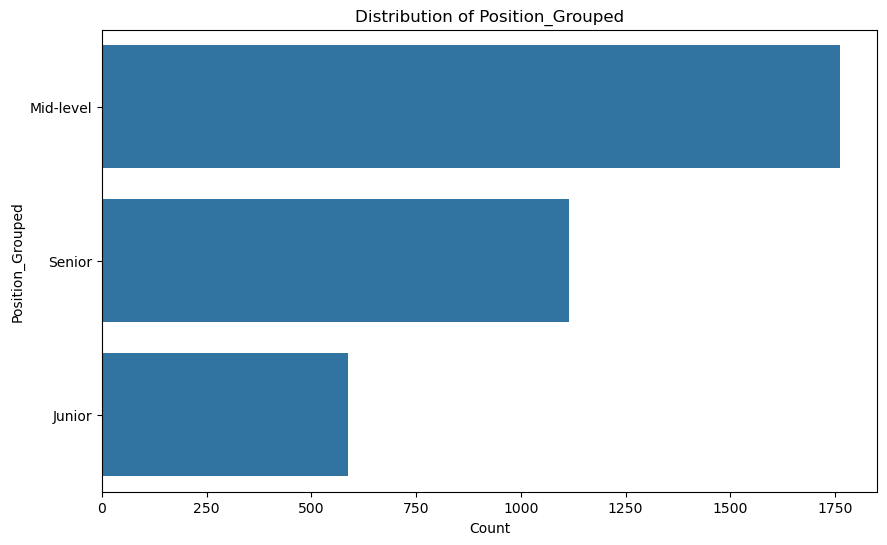

In [15]:
# Define the categorical columns
categorical_columns = ['Position_Grouped']

# Loop through each categorical column and plot a horizontal bar plot
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=clean_data, order=clean_data[col].value_counts().index)  # order by frequency
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

### 3.2 Confidence Interval analysis of selected variables

In [48]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def sampling_distribution_analysis(data, column, confidence_level=0.95):
    # Sampling distribution for mean
    sample_data = data[column]
    
    # Fit the distribution to a normal distribution
    mu, std = stats.norm.fit(sample_data)

    # Calculate lower and upper quartiles (25th and 75th percentiles)
    lower_quartile = np.percentile(sample_data, 25)
    upper_quartile = np.percentile(sample_data, 75)

    # Plot histogram and fitted distribution
    plt.figure(figsize=(10, 6))
    plt.hist(sample_data, bins=30, density=True, alpha=0.9, color='lightblue')

    # Plot the PDF
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    # Add a vertical line for the mean
    plt.axvline(mu, color='red', linestyle='dashed', linewidth=2)
    plt.text(mu + (xmax - xmin) * 0.03, max(p) * 0.4, 'Mean', color='red', ha='center')


    # Add vertical lines for lower and upper quartiles
    plt.axvline(lower_quartile, color='green', linestyle='dashed', linewidth=2)
    plt.text(lower_quartile + (xmax - xmin) * 0.07, max(p) * 0.6, '25th Percentile', color='green', ha='center')
    
    plt.axvline(upper_quartile, color='blue', linestyle='dashed', linewidth=2)
    plt.text(upper_quartile+ (xmax - xmin) * 0.07 , max(p) * 0.7, '75th Percentile', color='blue', ha='center')

    # Labels and title
    plt.title(f'Distribution Fitting for {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Confidence Interval
    confidence_interval = stats.norm.interval(confidence_level, loc=mu, scale=std/np.sqrt(len(sample_data)))
    
    # Print results
    print(f"{column} - Mean: {mu:.2f}, Std Dev: {std:.2f}")
    print(f"{confidence_level*100:.1f}% Confidence Interval: {confidence_interval}")
    print(f"25th Percentile: {lower_quartile:.2f}, 75th Percentile: {upper_quartile:.2f}")



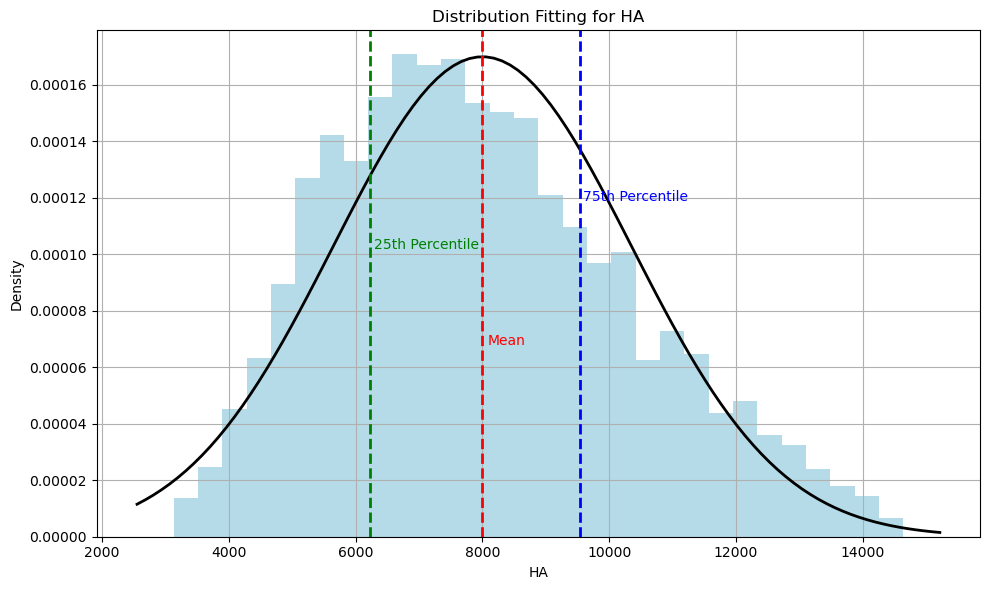

HA - Mean: 7999.39, Std Dev: 2347.40
95.0% Confidence Interval: (7921.221511378721, 8077.563478806036)
25th Percentile: 6233.58, 75th Percentile: 9535.25


In [49]:
# Apply the function to HA, Salary, In Company Years, and Years of Experience
sampling_distribution_analysis(clean_data, 'HA')

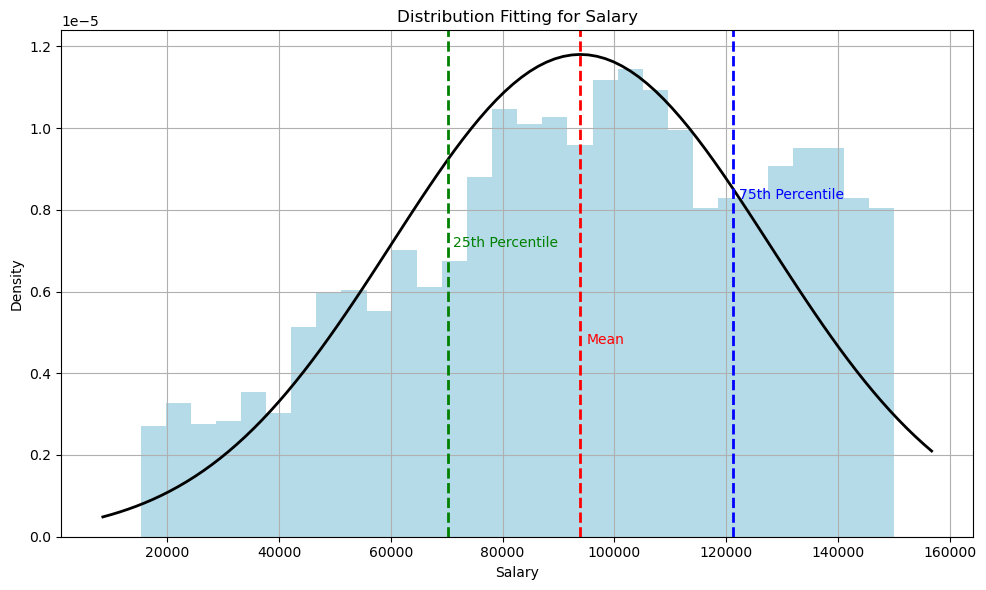

Salary - Mean: 93894.63, Std Dev: 33804.14
95.0% Confidence Interval: (92768.91525493351, 95020.34800719122)
25th Percentile: 70148.85, 75th Percentile: 121215.48


In [50]:
sampling_distribution_analysis(clean_data, 'Salary')

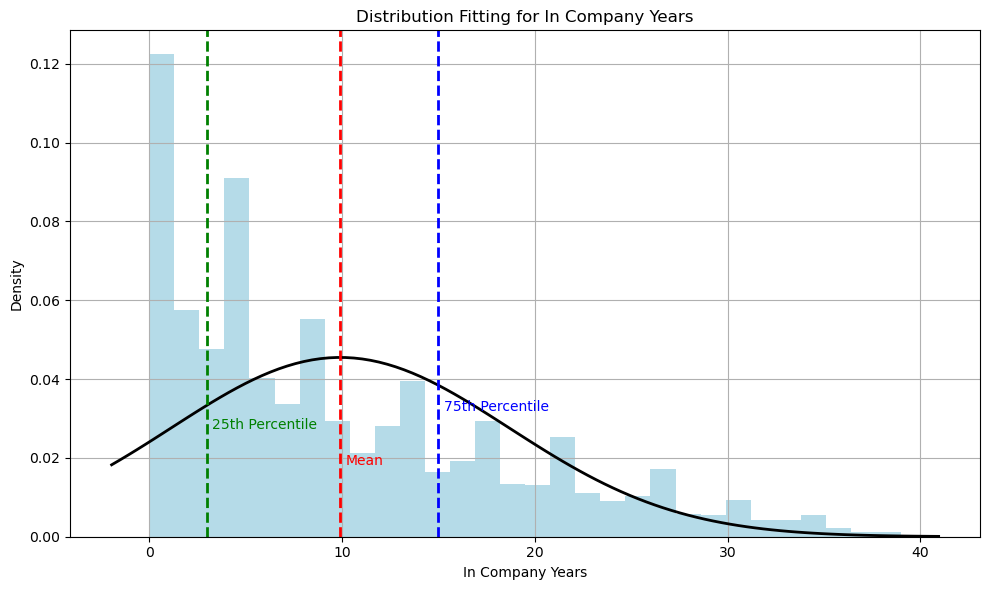

In Company Years - Mean: 9.91, Std Dev: 8.77
95.0% Confidence Interval: (9.613245041971528, 10.19737851461046)
25th Percentile: 3.00, 75th Percentile: 15.00


In [52]:
sampling_distribution_analysis(clean_data, 'In Company Years')

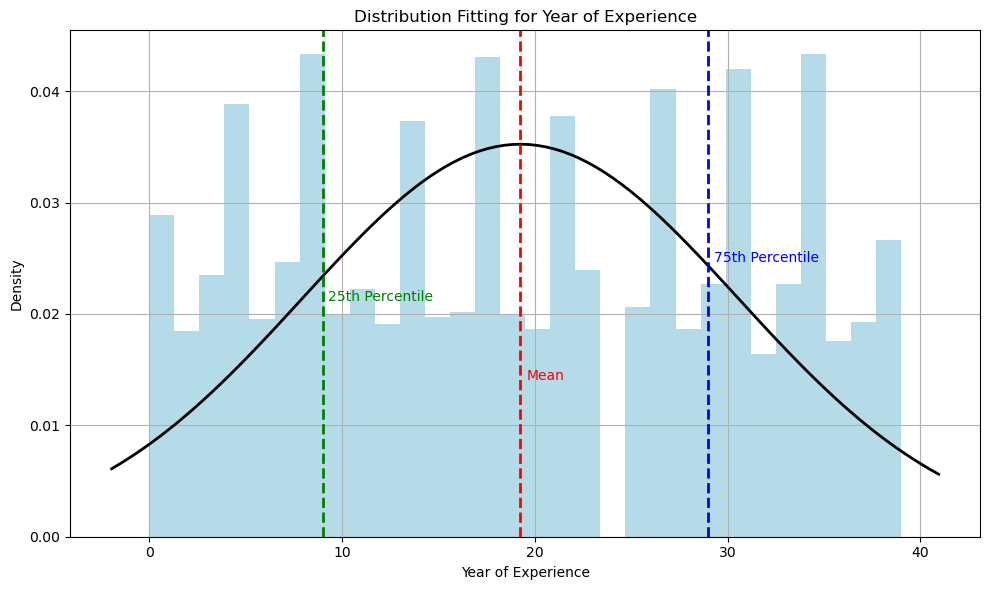

Year of Experience - Mean: 19.25, Std Dev: 11.32
95.0% Confidence Interval: (18.87360790016329, 19.6275468342478)
25th Percentile: 9.00, 75th Percentile: 29.00


In [53]:
sampling_distribution_analysis(clean_data, 'Year of Experience')

### 3.3 Data Issues

Not Found as for now

## 4 Hypothesis Testing

### 4.1 Interesting Hypothesis

Age vs. Dependents:.

Gross Salary vs. In Company Years:

Cost of Living Adjustments (COLA):

Experience vs. Tenure:

In [74]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# 1. Age vs. Dependents: Chi-square test for independence
def chi_square_test(df):
    # Cross-tabulation of Age and Dependents
    contingency_table = pd.crosstab(df['Age'], df['Dependents'])
    
    # Perform Chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    
    print(f"Chi-square test between Age and Dependents:")
    print(f"Chi2 statistic: {chi2:.3f}, p-value: {p:.3f}")
    if p < 0.05:
        print("There is a significant association between Age and Dependents.")
    else:
        print("No significant association between Age and Dependents.")

# 2. Gross Salary vs. In Company Years: ANOVA
def anova_salary_years(df):
    # Group 'In Company Years' into categories (e.g., quartiles)
    df['Years_Group'] = pd.qcut(df['In Company Years'], 4)  # Divide into quartiles
    
    # Perform one-way ANOVA
    grouped = df.groupby('Years_Group')['Gross Salary']
    f_stat, p_value = stats.f_oneway(*[group for name, group in grouped])
    
    print(f"\nANOVA for Gross Salary by In Company Years Group:")
    print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")
    if p_value < 0.05:
        print("There is a significant difference in Gross Salary across different Years in Company groups.")
    else:
        print("No significant difference in Gross Salary across different Years in Company groups.")

# 3. Cost of Living Adjustments (COLA): One-sample T-test or Z-test
def cola_test(df, test_value, test_type='t-test'):
    mean_cola = np.mean(df['COLA'])
    n = len(df['COLA'])
    std_cola = np.std(df['COLA'], ddof=1)  # Sample standard deviation

    if test_type == 't-test':
        # One-sample T-test
        t_stat, p_value = stats.ttest_1samp(df['COLA'], test_value)
        print(f"\nOne-sample T-test for COLA:")
        print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")
    elif test_type == 'z-test':
        # Z-test (for larger sample size)
        z_stat = (mean_cola - test_value) / (std_cola / np.sqrt(n))
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed Z-test
        print(f"\nZ-test for COLA:")
        print(f"Z-statistic: {z_stat:.3f}, p-value: {p_value:.3f}")
    
    if p_value < 0.05:
        print(f"The mean COLA is significantly different from {test_value}.")
    else:
        print(f"The mean COLA is not significantly different from {test_value}.")

# 4. Experience vs. Tenure: Paired T-test
def experience_tenure_test(df):
    t_stat, p_value = stats.ttest_rel(df['Year of Experience'], df['In Company Years'])
    print(f"\nPaired T-test for Experience vs. Tenure:")
    print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")
    if p_value < 0.05:
        print("There is a significant difference between Years of Experience and In Company Years.")
    else:
        print("No significant difference between Years of Experience and In Company Years.")

# Example usage with your dataframe (replace df with your actual dataframe variable):
# chi_square_test(clean_data)
# anova_salary_years(clean_data)
# cola_test(clean_data, test_value=22000, test_type='t-test')  # For T-test
# cola_test(clean_data, test_value=22000, test_type='z-test')  # For Z-test
# experience_tenure_test(clean_data)


In [81]:
# Cross-tabulation of Age and Dependents
contingency_table = pd.crosstab(clean_data['Age'], clean_data['Dependents'])

# Perform Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test between Age and Dependents:")
print(f"Chi2 statistic: {chi2:.3f}, p-value: {p:.3f}")
if p < 0.05:
    print("There is a significant association between Age and Dependents.")
else:
    print("No significant association between Age and Dependents.")

Chi-square test between Age and Dependents:
Chi2 statistic: 2386.432, p-value: 0.000
There is a significant association between Age and Dependents.


In [85]:
# Group 'In Company Years' into categories (e.g., quartiles)
clean_data['Years_Group'] = pd.qcut(clean_data['In Company Years'], 4)  # Divide into quartiles

# Perform one-way ANOVA
grouped = clean_data.groupby('Years_Group')['Gross Salary']
f_stat, p_value = stats.f_oneway(*[group for name, group in grouped])

print(f"\nANOVA for Gross Salary by In Company Years Group:")
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")
if p_value < 0.05:
    print("There is a significant difference in Gross Salary across different Years in Company groups.")
else:
    print("No significant difference in Gross Salary across different Years in Company groups.")


ANOVA for Gross Salary by In Company Years Group:
F-statistic: 647.134, p-value: 0.000
There is a significant difference in Gross Salary across different Years in Company groups.


C:\Users\Jer_SMU\AppData\Local\Temp\ipykernel_552\103923032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Years_Group'] = pd.qcut(clean_data['In Company Years'], 4)  # Divide into quartiles
C:\Users\Jer_SMU\AppData\Local\Temp\ipykernel_552\103923032.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = clean_data.groupby('Years_Group')['Gross Salary']


In [87]:
test_value = 22000
mean_cola = np.mean(clean_data['COLA'])
n = len(clean_data['COLA'])
std_cola = np.std(clean_data['COLA'], ddof=1)  # Sample standard deviation

# Z-test (for large sample size)
z_stat = (mean_cola - test_value) / (std_cola / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))  # Two-tailed Z-test

print(f"\nZ-test for COLA:")
print(f"Z-statistic: {z_stat:.3f}, p-value: {p_value:.3f}")

if p_value < 0.05:
    print(f"The mean COLA is significantly different from {test_value}.")
else:
    print(f"The mean COLA is not significantly different from {test_value}.")


Z-test for COLA:
Z-statistic: 1.181, p-value: 0.238
The mean COLA is not significantly different from 22000.


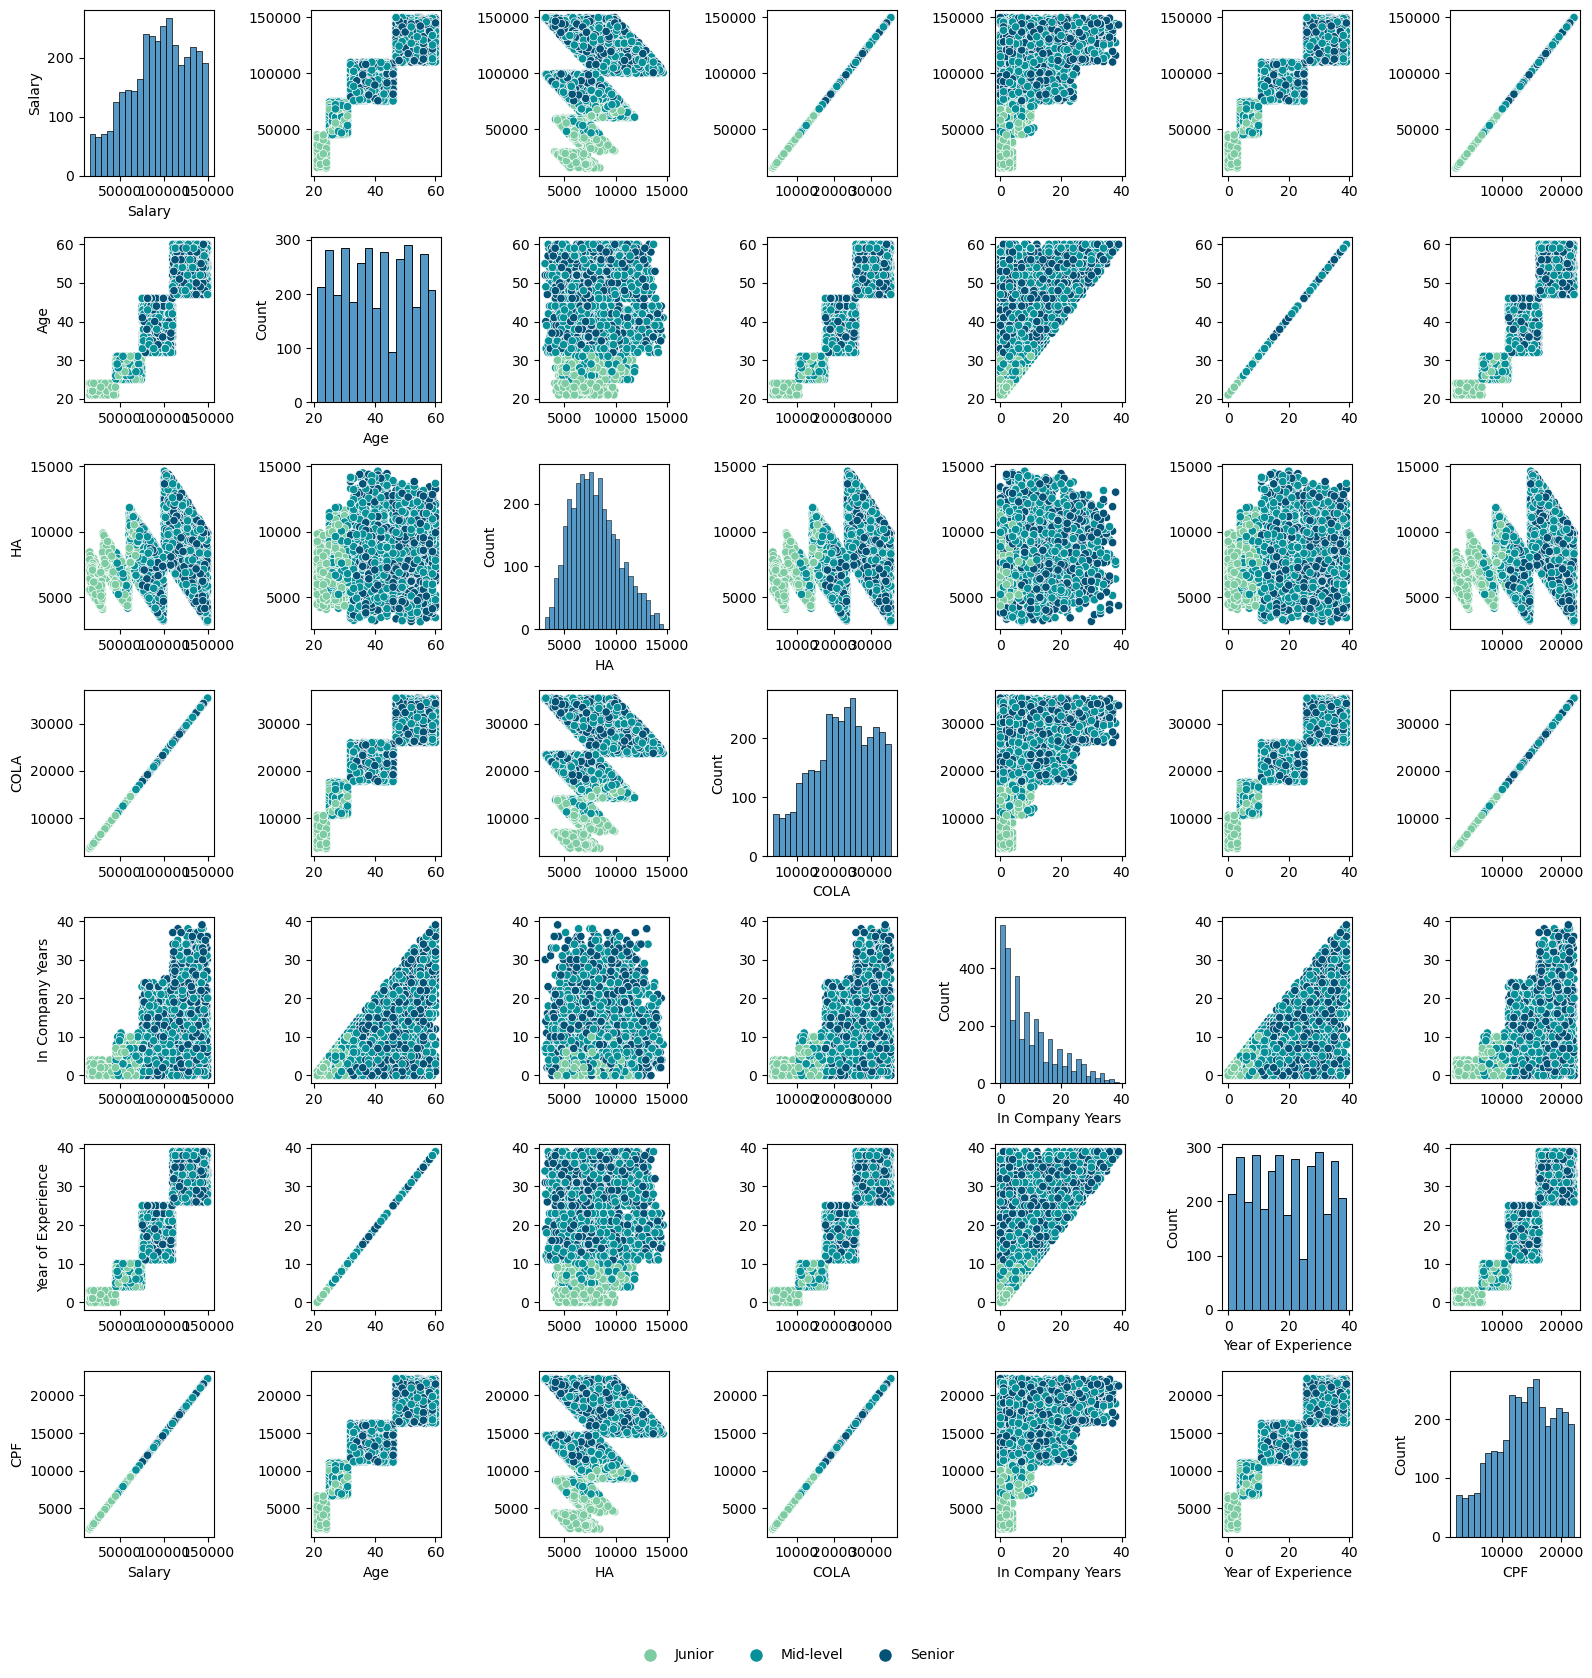

In [16]:
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt

# Define plotting function
def myplotGrid(clean_data, label_column):
    '''
    Display a diagram showing relationships between features in clean_data with subplots
    ---
    inputs:
        clean_data: a pandas DataFrame containing features and label
        label_column: the name of the column in the DataFrame containing the labels (y)
    Return:
        None
    '''
    # Select relevant features for analysis
    selected_features = ['Salary', 'Age', 'HA', 'COLA', 'In Company Years', 'Year of Experience','CPF']
    X = clean_data[selected_features].values
    y = clean_data[label_column].values

    # Assign fixed colors for each position group
    color_mapping = {'Junior': '#7CCBA2', 'Mid-level': '#089099', 'Senior': '#045275'}
    colour_map = clean_data[label_column].map(color_mapping)

    last_row = [len(selected_features) * (len(selected_features)-1) + i for i in range(1, len(selected_features) + 1)]
    first_col = [i * len(selected_features) for i in range(len(selected_features))]

    fig = plt.figure(figsize=(16, 16))
    n = 0
    l = len(selected_features)

    # iteratively access the data and create the respective plot
    for i in range(0, l):
        for j in range(0, l):
            
            # Generate a l by l grid of figures
            ax = fig.add_subplot(l, l, n + 1)
            
            # Display the axis name
            xlabels = selected_features[j]
            ylabels = selected_features[i]

            # Only display horizontal axis on last row
            if n+1 in last_row:
                ax.set_xlabel(xlabels)
            
            # Only display vertical axis on the first column
            if n in first_col:
                ax.set_ylabel(ylabels)
            
            # Plot histogram on the diagonal
            if i == j:
                sns.histplot(clean_data[selected_features[i]], kde=False, ax=ax)
            # Plot scatter plot elsewhere
            else:
                sns.scatterplot(x=X[:, j], y=X[:, i], palette=color_mapping, hue=clean_data[label_column], ax=ax, legend=False)
                
            # Move to the next plot
            n = n+1
    
    # Create a custom legend at the bottom explaining the color categories
    handles = [Line2D([0], [0], marker='o', color='w', label='Junior', markerfacecolor='#7CCBA2', markersize=10),
               Line2D([0], [0], marker='o', color='w', label='Mid-level', markerfacecolor='#089099', markersize=10),
               Line2D([0], [0], marker='o', color='w', label='Senior', markerfacecolor='#045275', markersize=10)]

    fig.legend(handles=handles, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)
    
    plt.tight_layout()
    plt.show()

# Example usage (assuming clean_data is already defined and contains the Position_Grouped column)
myplotGrid(clean_data, 'Position_Grouped')
